# Import Libraries and Datasets

In [2]:
# Import the neccessary libraraies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from matplotlib.dates import *

In [3]:
# Import single datatset 
general=pd.read_csv('ggeneral_final.csv')
goals=pd.read_csv('ggoals_final.csv')
creative=pd.read_csv('creative_final.csv')

In [4]:
# Format Date columns in all datatsets 
# Change date column to datetime
goals['date'] = pd.to_datetime(goals['date'])
creative['date'] = pd.to_datetime(creative['date'])
general['date'] = pd.to_datetime(general['date'])

In [5]:
# Check results by audience 
# Group the datset by audience
# View the datatset
G_A=general.groupby(['audience']).sum().reset_index()
G_A

,audience,...1,total_sessions,total_bounces,total_duration,days_away,latest_report
0,1.0,13616268,8335.0,3,37156.0,205311,95
1,2.0,7538623,4596.0,0,12294.0,116547,49
2,3.0,9626497,7481.0,0,19971.0,131363,85
3,4.0,24430713,23056.0,13,249436.0,341640,307
4,5.0,18655094,16386.0,1559,429768.0,272279,179
5,6.0,7830564,21027.0,23,2210103.0,142500,51


#### New dataframe was created in order to accuratley plot/visualise sessions & bounce results based on the indivdual audiences

In [6]:
# Change audince from float data type to integer 
G_A['audience'] = G_A['audience'].astype(int)

# view dataframe 
G_A

,audience,...1,total_sessions,total_bounces,total_duration,days_away,latest_report
0,1,13616268,8335.0,3,37156.0,205311,95
1,2,7538623,4596.0,0,12294.0,116547,49
2,3,9626497,7481.0,0,19971.0,131363,85
3,4,24430713,23056.0,13,249436.0,341640,307
4,5,18655094,16386.0,1559,429768.0,272279,179
5,6,7830564,21027.0,23,2210103.0,142500,51


# Visulisations

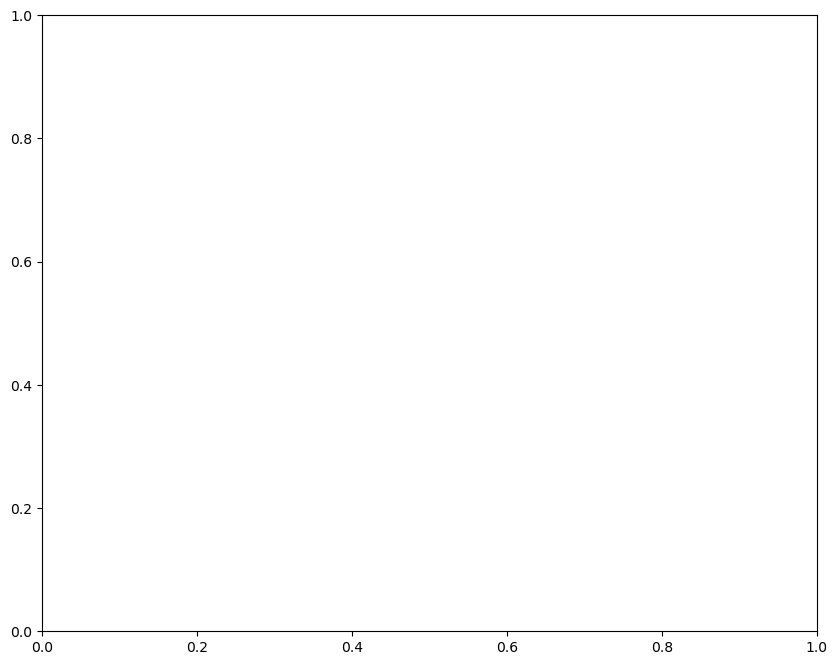

In [6]:
# Adjust plot size
plt.rcParams["figure.figsize"]=(10,8)
fig, ax=plt.subplots()

Text(0.5, 1.0, 'Total Bounces by audience')

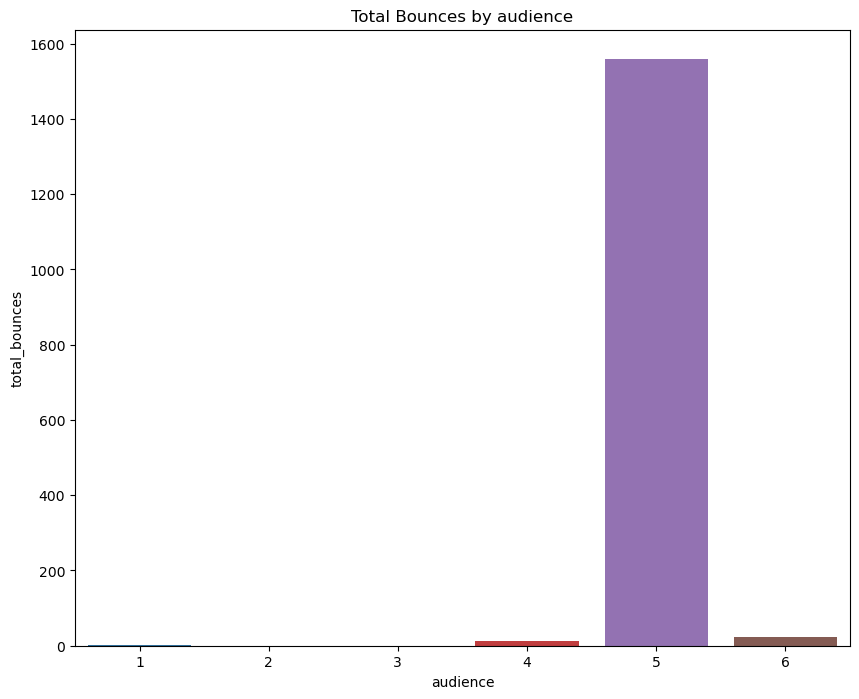

In [12]:
# Create barplot 
# Visualise Total bounces by audience
sns.barplot(x='audience', y='total_bounces',
             data=G_A,
             ci=None).set_title('Total Bounces by audience')

Text(0.5, 1.0, 'Bounces by Creative_family')

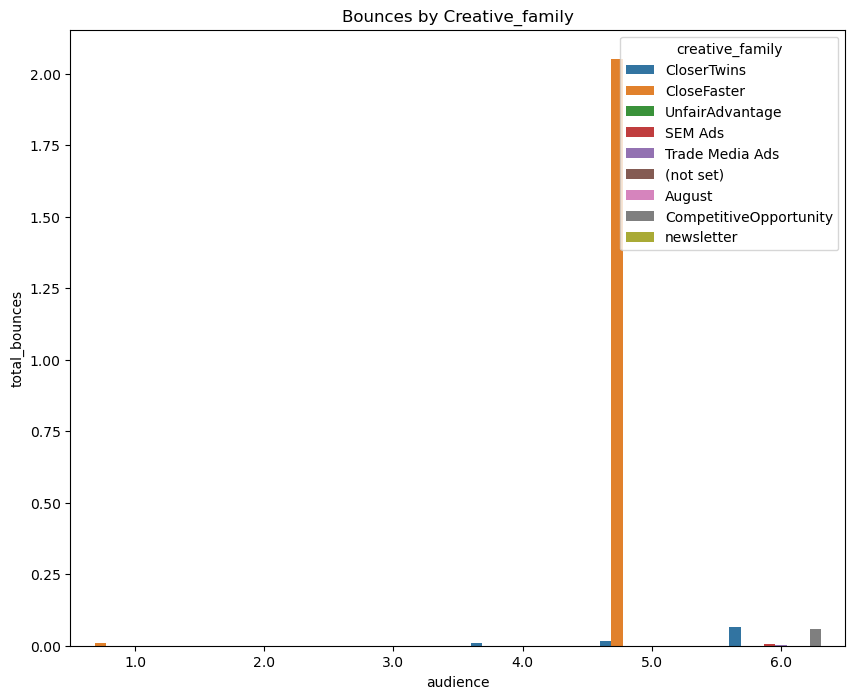

In [13]:
# Create Barplot
# Visualise Total bounces by creative Family
sns.barplot(x='audience', y='total_bounces',
             data=general,hue='creative_family',
             ci=None).set_title('Bounces by Creative_family')

Text(0.5, 1.0, 'Bounces by Platform')

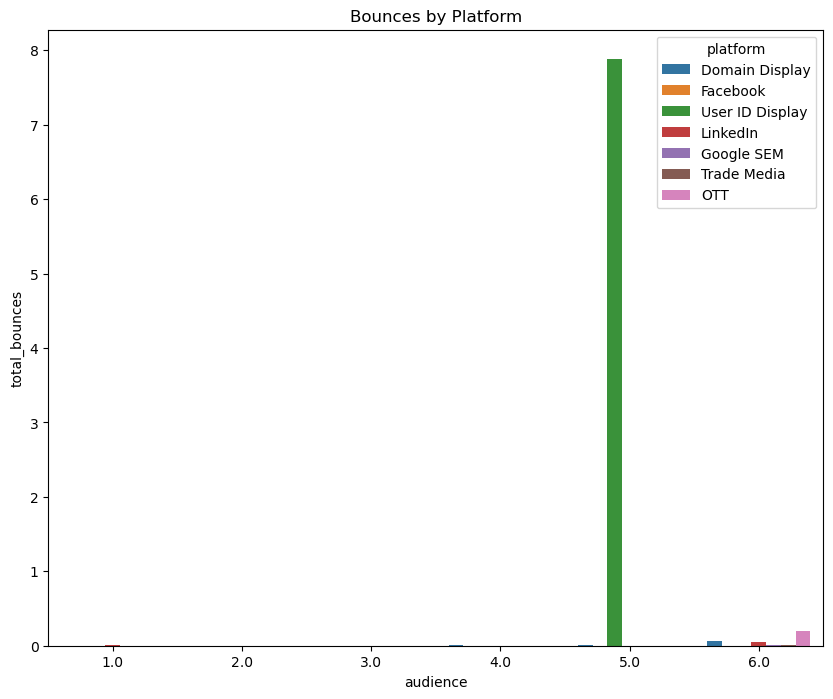

In [67]:
# Create barplot
sns.barplot(x='audience', y='total_bounces',
             data=general,hue='platform',
             ci=None).set_title('Bounces by Platform')

In [15]:
# Group data by ad_format
# Group by ad_format
general.groupby(['ad_format']).sum()

,...1,audience,total_sessions,total_bounces,total_duration,days_away,latest_report
ad_format,,,,,,,
Animated,1912271,1171.0,1710.0,0,70460.0,24642,29
CPC,3240876,2892.0,17380.0,3,2061257.0,47764,30
Carousel,3698181,2014.0,3645.0,0,95197.0,58884,44
Chrisman,189687,174.0,160.0,0,35087.0,3105,0
Housingwire,1372444,1224.0,1045.0,1,31870.0,24285,9
Inside_mortgage_finance_newsletter,1081544,1002.0,918.0,1,38428.0,18342,11
National_mortgage_news,529950,480.0,140.0,0,6565.0,11387,0
Scotsman,251405,210.0,136.0,0,18840.0,6457,0
Single image,27573362,13798.0,17663.0,6,280314.0,388098,294


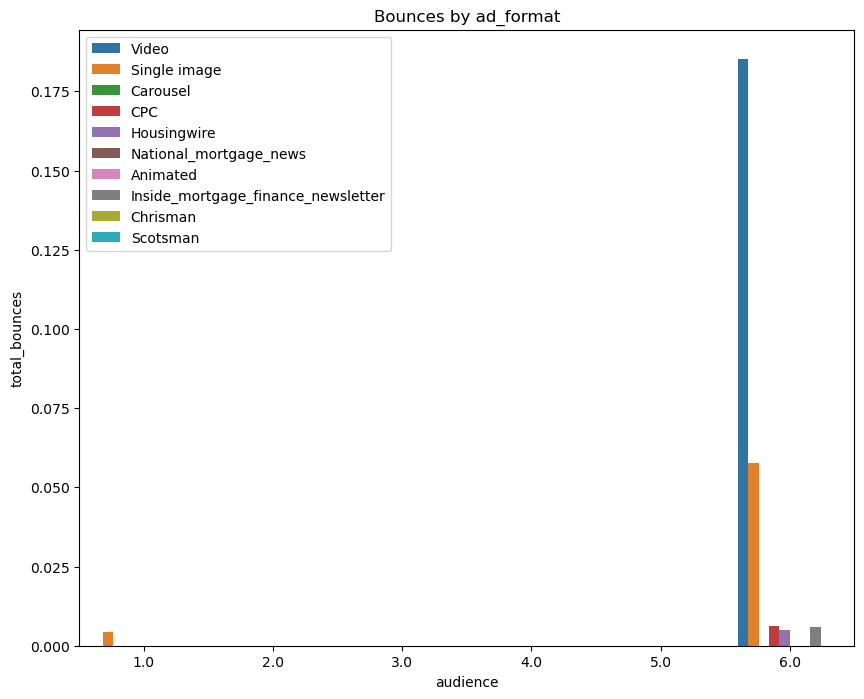

In [71]:
# Create barplot 
sns.barplot(x='audience', y='total_bounces',
             data=general,hue='ad_format',
             ci=None).set_title('Bounces by ad_format')

plt.legend(loc='upper left')

In [17]:
# Create new data frame 
# Include newly registered client
Goal_Values = ['Form Submission'] 

newbees =goals.loc[goals['goal'].isin(Goal_Values)]

# View Dataframe 
newbees

,...1,date,campaign,audience,creative_family,creative_version,platform,ad_format,goal,completions,campaign_traffic,days_away,latest_report
1,1,2022-04-01,(not set),NaN,NaN,NaN,NaN,NaN,Form Submission,2.0,General traffic,213.0,0.0
10,10,2022-04-04,(not set),NaN,NaN,NaN,NaN,NaN,Form Submission,1.0,General traffic,210.0,0.0
14,14,2022-04-05,(not set),NaN,NaN,NaN,NaN,NaN,Form Submission,5.0,General traffic,209.0,0.0
18,18,2022-04-06,(not set),NaN,NaN,NaN,NaN,NaN,Form Submission,3.0,General traffic,208.0,0.0
25,25,2022-04-07,(not set),NaN,NaN,NaN,NaN,NaN,Form Submission,3.0,General traffic,207.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16322,16322,2022-10-31,(not set),NaN,NaN,NaN,NaN,NaN,Form Submission,2.0,General traffic,0.0,1.0
16348,16348,2022-10-25,adhocwhol,NaN,NaN,NaN,NaN,NaN,Form Submission,1.0,General traffic,6.0,1.0
16472,16472,2022-10-27,Brand_Exact,6.0,SEM Ads,Change Wholesale,Google SEM,CPC,Form Submission,1.0,Campaign,4.0,1.0
16473,16473,2022-10-28,Brand_Exact,6.0,SEM Ads,Change Wholesale,Google SEM,CPC,Form Submission,1.0,Campaign,3.0,1.0


In [18]:
# Group newly registered brokers by audience
# View dataframe
newaud=newbees.groupby(['audience']).sum()
newaud

,...1,completions,days_away,latest_report
audience,,,,
1.0,6218,1.0,188.0,0.0
2.0,6174,1.0,183.0,0.0
4.0,6220,1.0,186.0,0.0
5.0,17673,3.0,547.0,0.0
6.0,594774,100.0,10477.0,4.0


In [121]:
newbees['audience'].value_counts()

6.0    79
5.0     3
2.0     1
1.0     1
4.0     1
Name: audience, dtype: int64

Text(0.5, 1.0, 'New & Prospective Brokers - Completions by Audience')

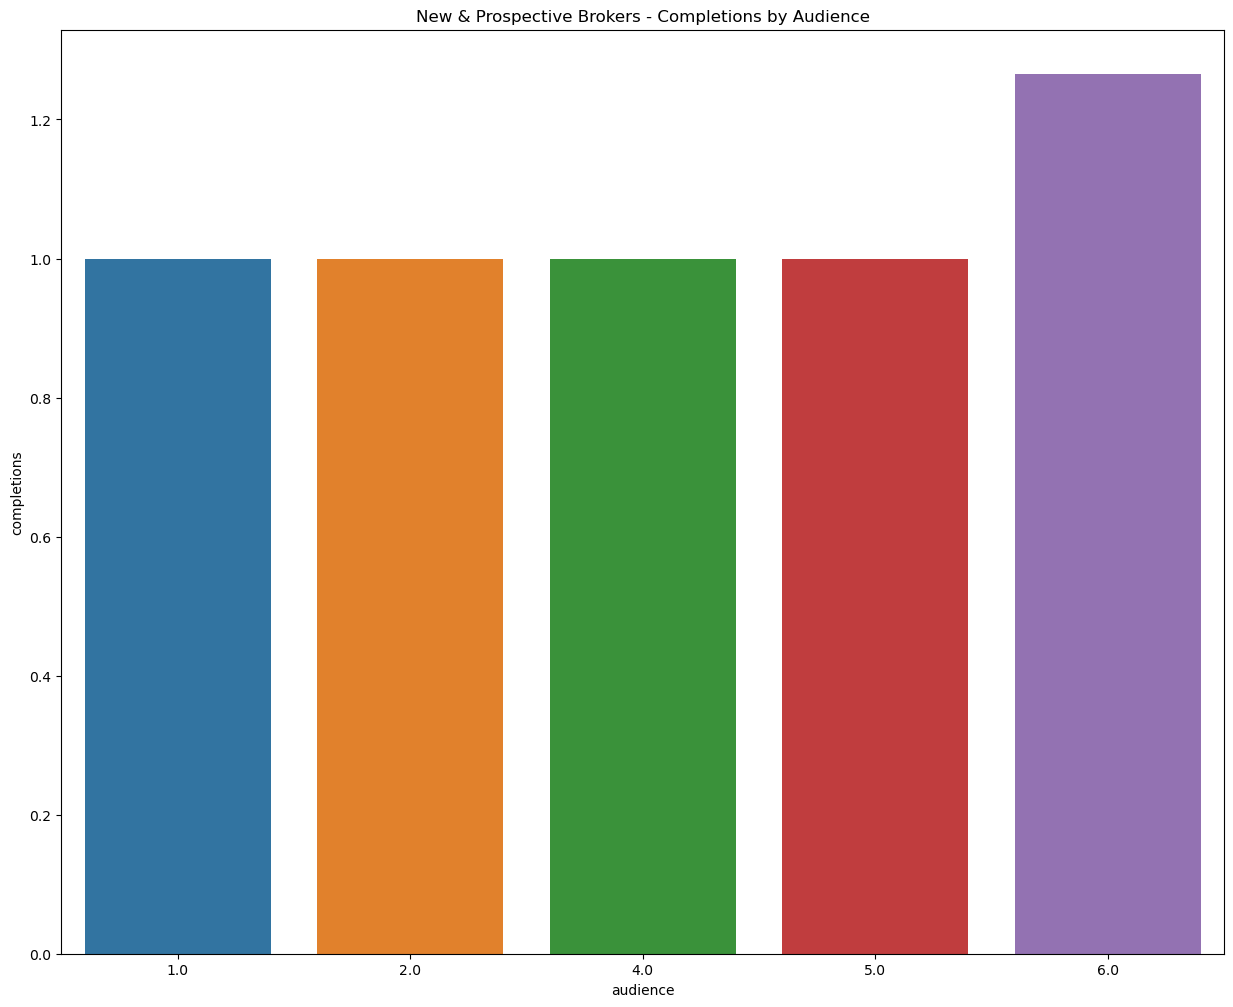

In [32]:
# Draw line plot with seaborn
# Line plot is appointment count by service setting
sns.barplot(x='audience', y='completions',
             data=newbees,
             ci=None).set_title('New & Prospective Brokers - Completions by Audience')

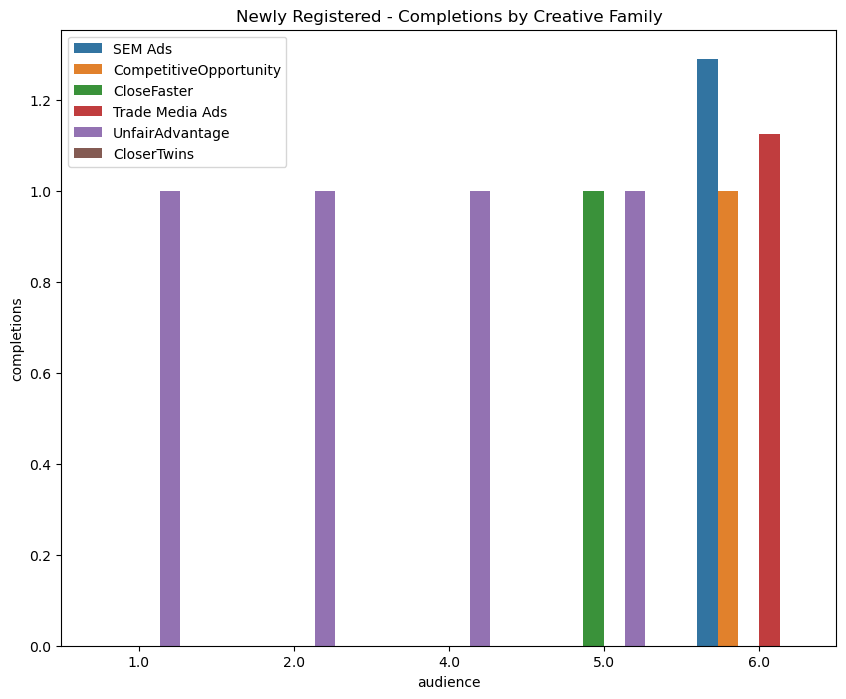

In [122]:
# Draw line plot with seaborn
# Line plot is appointment count by service setting
sns.barplot(x='audience', y='completions',
             data=newbees,hue='creative_family',
             ci=None).set_title('Newly Registered - Completions by Creative Family')


plt.legend(loc='upper left')

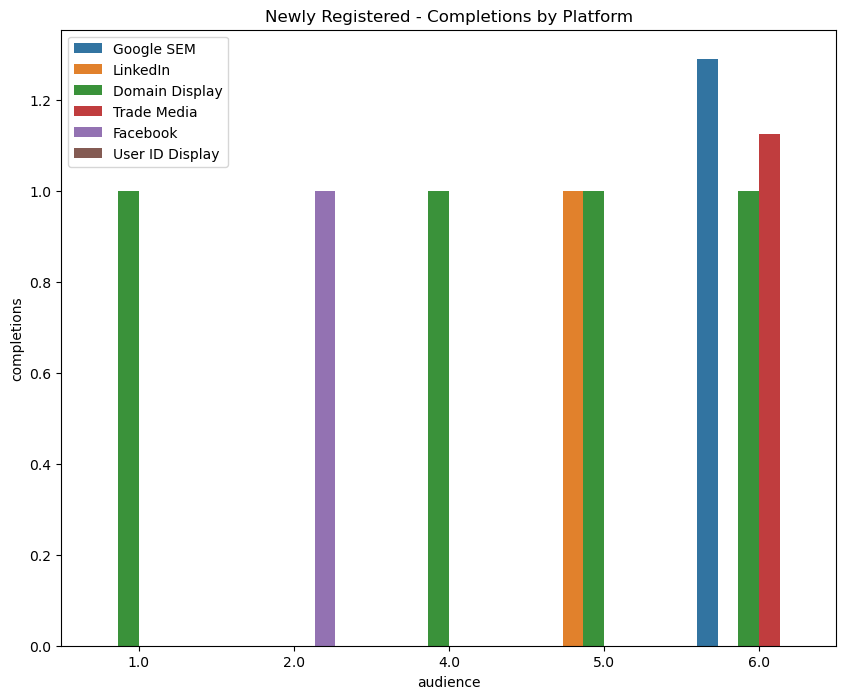

In [124]:
# Create barplot 
sns.barplot(x='audience', y='completions',
             data=newbees,hue='platform',
             ci=None).set_title('Newly Registered - Completions by Platform')

plt.legend(loc='upper left')

### New registration by month 

In [43]:
# Group by date and audience
newbees_a=newbees.groupby([newbees.date.dt.month,'audience']).sum().reset_index()

# View Dataframe 
newbees_a

,date,audience,...1,completions,days_away,latest_report
0,4,1.0,6218,1.0,188.0,0.0
1,4,4.0,6220,1.0,186.0,0.0
2,4,5.0,5766,1.0,185.0,0.0
3,4,6.0,64328,33.0,4008.0,0.0
4,5,2.0,6174,1.0,183.0,0.0
5,5,5.0,11907,2.0,362.0,0.0
6,5,6.0,102045,24.0,3145.0,0.0
7,6,6.0,100816,16.0,2097.0,0.0
8,7,6.0,57451,6.0,599.0,0.0
9,8,6.0,11881,1.0,63.0,0.0


Text(0.5, 1.0, 'Newly registered brokers - Completions per Month')

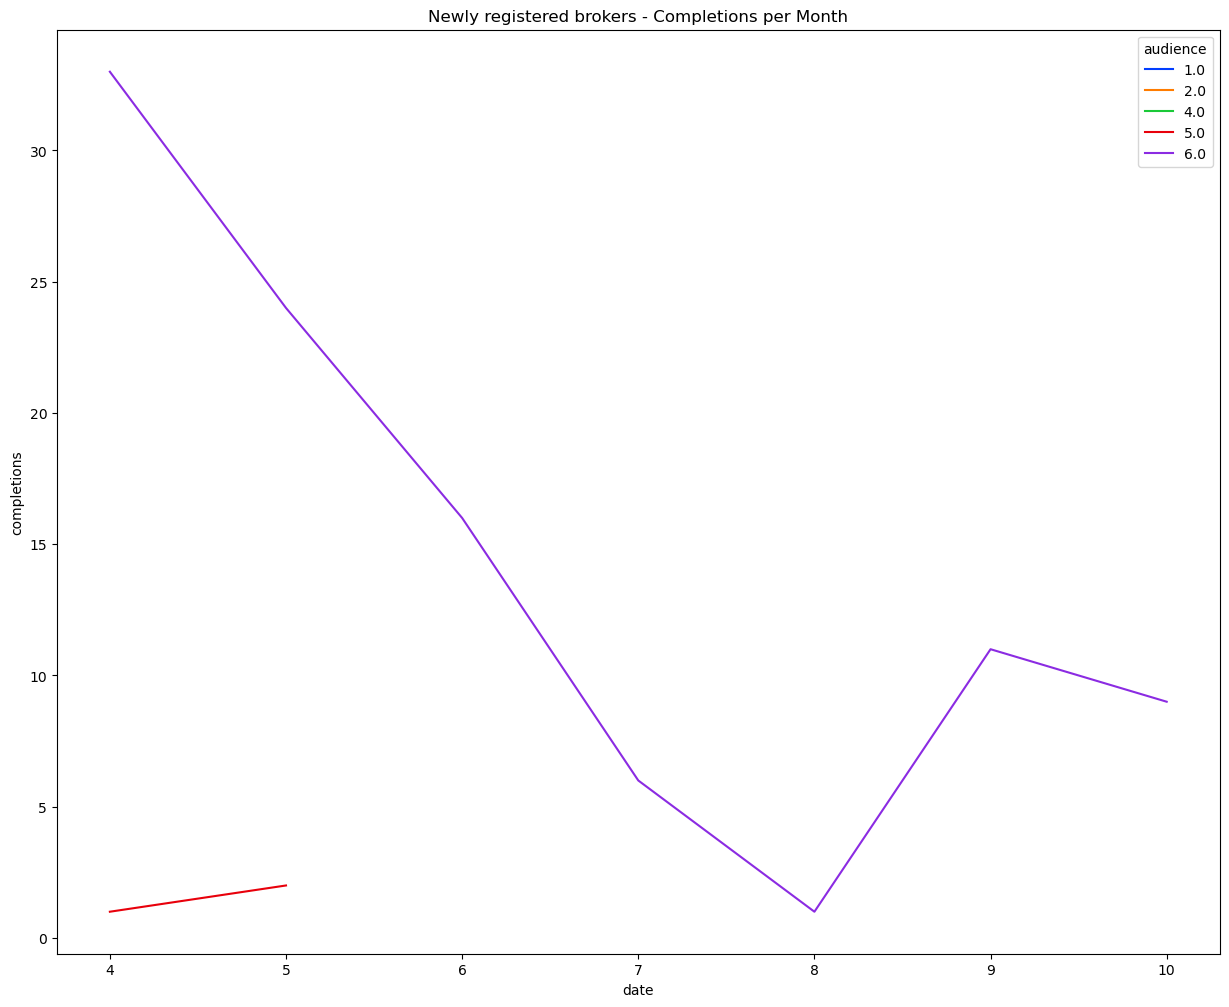

In [47]:
# Create Lineplot 
# Completions from newly registered brokers by month
sns.lineplot(x='date', y='completions',
             data=newbees_a,hue='audience',palette='bright',
             ci=None).set_title('Newly registered brokers - Completions per Month')

## Audiences 3-5

In [51]:

Audience_Values = [3,4,5] 

newbees_aa =newbees.loc[newbees['audience'].isin(Audience_Values)]

# View dataframe 
newbees_aa

,...1,date,campaign,audience,creative_family,creative_version,platform,ad_format,goal,completions,campaign_traffic,days_away,latest_report
5766,5766,2022-04-29,FY23_broker_campaign,5.0,CloseFaster,MoreAll,Domain Display,NaN,Form Submission,1.0,Campaign,185.0,0.0
5772,5772,2022-05-02,FY22_broker_campaign_ph2,5.0,CloseFaster,NoDTI,LinkedIn,Single image,Form Submission,1.0,Campaign,182.0,0.0
6135,6135,2022-05-04,FY23_broker_campaign,5.0,UnfairAdvantage,1099,Domain Display,Single image,Form Submission,1.0,Campaign,180.0,0.0
6220,6220,2022-04-28,FY23_broker_campaign,4.0,UnfairAdvantage,one_page,Domain Display,NaN,Form Submission,1.0,Campaign,186.0,0.0


In [52]:
# Group by date and audience
newbees_s=newbees_aa.groupby([newbees_aa.date.dt.month,'audience']).sum().reset_index()

#View Dataframe 
newbees_s

,date,audience,...1,completions,days_away,latest_report
0,4,4.0,6220,1.0,186.0,0.0
1,4,5.0,5766,1.0,185.0,0.0
2,5,5.0,11907,2.0,362.0,0.0


In [104]:
# Group by date and audience
newbees_cf=newbees_aa.groupby([newbees_aa.date.dt.month,'audience','creative_family']).sum().reset_index()

#View Dataframe 
newbees_cf

,date,audience,creative_family,...1,completions,days_away,latest_report
0,4,4.0,UnfairAdvantage,6220,1.0,186.0,0.0
1,4,5.0,CloseFaster,5766,1.0,185.0,0.0
2,5,5.0,CloseFaster,5772,1.0,182.0,0.0
3,5,5.0,UnfairAdvantage,6135,1.0,180.0,0.0


Text(0.5, 1.0, 'NR Audiences 3-5 - Completions per Month')

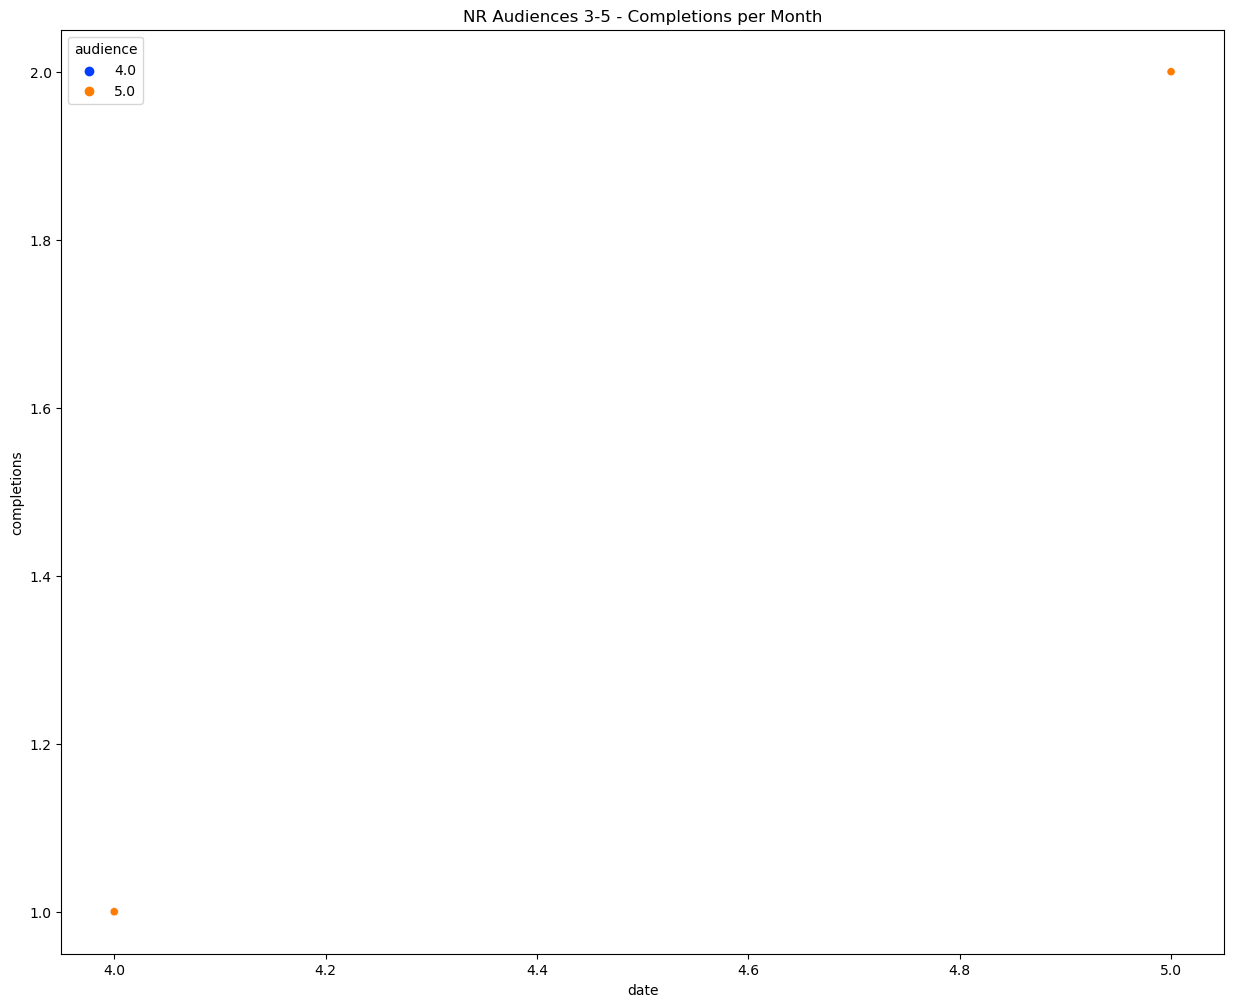

In [55]:
# Create scatterplot 
# Compeltions by month - newly registered audiences 3-5
sns.scatterplot(x='date', y='completions',
             data=newbees_s,hue='audience',palette='bright',
             ci=None).set_title('NR Audiences 3-5 - Completions per Month')

Text(0.5, 1.0, 'NR Audiences 3-5 - Completions per Month')

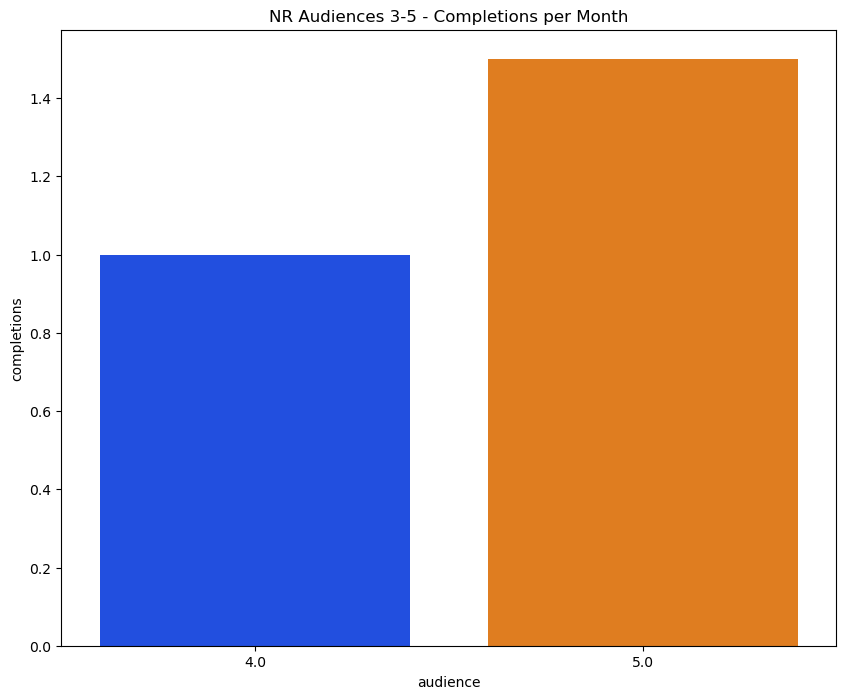

In [115]:
# Create Barplot
# Barplot for sessions across audiences
sns.barplot(x='audience', y='completions',
             data=newbees_s,palette='bright',
             ci=None).set_title('NR Audiences 3-5 - Completions per Month')

Text(0.5, 1.0, 'NR Audiences 3-5 - Completions per Month')

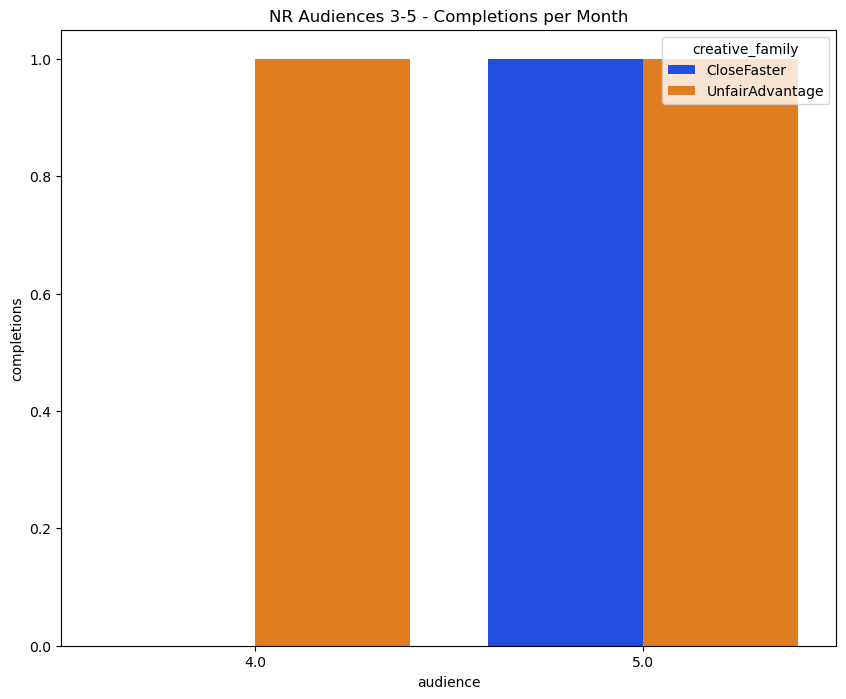

In [106]:
# Barplot for sessions across audiences
sns.barplot(x='audience', y='completions',
             data=newbees_aa,hue= 'creative_family',palette='bright',
             ci=None).set_title('NR Audiences 3-5 - Completions per Month')

##### Newly registered individuals from audiences 3-5 accoutn for 
##### Newly registered from audience 4 and 5 accounts for 0.3% of completions for Unfair Advantage 

### General Data set

In [76]:
general.groupby(['audience']).sum()

,...1,total_sessions,total_bounces,total_duration,days_away,latest_report
audience,,,,,,
1.0,13616268,8335.0,3,37156.0,205311,95
2.0,7538623,4596.0,0,12294.0,116547,49
3.0,9626497,7481.0,0,19971.0,131363,85
4.0,24430713,23056.0,13,249436.0,341640,307
5.0,18655094,16386.0,1559,429768.0,272279,179
6.0,7830564,21027.0,23,2210103.0,142500,51


In [77]:
#Create variable for audiences 3-5
general_new =general.loc[general['audience'].isin(Audience_Values)]

# View dataframe
general_new

,...1,date,audience,creative_family,creative_version,platform,ad_format,campaign_traffic,total_sessions,total_bounces,total_duration,days_away,latest_report
1,1,2022-06-16,3.0,CloseFaster,NoDTI,Facebook,Single image,Campaign,1.0,0,0.0,137,0
3,3,2022-06-09,4.0,UnfairAdvantage,one_page,LinkedIn,Single image,Campaign,2.0,0,50.0,144,0
5,5,2022-08-23,4.0,CloserTwins,MoreLoansAll,User ID Display,NaN,Campaign,3.0,0,0.0,69,0
6,6,2022-06-14,5.0,CloserTwins,Faceoff,Domain Display,NaN,Campaign,2.0,0,0.0,139,0
11,11,2022-04-30,4.0,UnfairAdvantage,NoDTI,LinkedIn,Single image,Campaign,1.0,0,0.0,184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,13182,2022-06-12,5.0,UnfairAdvantage,1099,Domain Display,Single image,Campaign,4.0,0,0.0,141,0
13011,13184,2022-10-22,4.0,UnfairAdvantage,1099,User ID Display,Single image,Campaign,1.0,0,0.0,9,1
13012,13185,2022-10-17,5.0,UnfairAdvantage,1099,LinkedIn,Single image,Campaign,6.0,0,0.0,14,0
13016,13189,2022-05-06,4.0,CloserTwins,Cutdown1B,LinkedIn,Video,Campaign,3.0,0,252.0,178,0


In [120]:
# create New Datrame
gn_sum= general_new.groupby(['audience']).sum()

gn_sum

,...1,total_sessions,total_bounces,total_duration,days_away,latest_report
audience,,,,,,
3.0,9626497,7481.0,0,19971.0,131363,85
4.0,24430713,23056.0,13,249436.0,341640,307
5.0,18655094,16386.0,1559,429768.0,272279,179


Text(0.5, 1.0, ' Sessions by Audience')

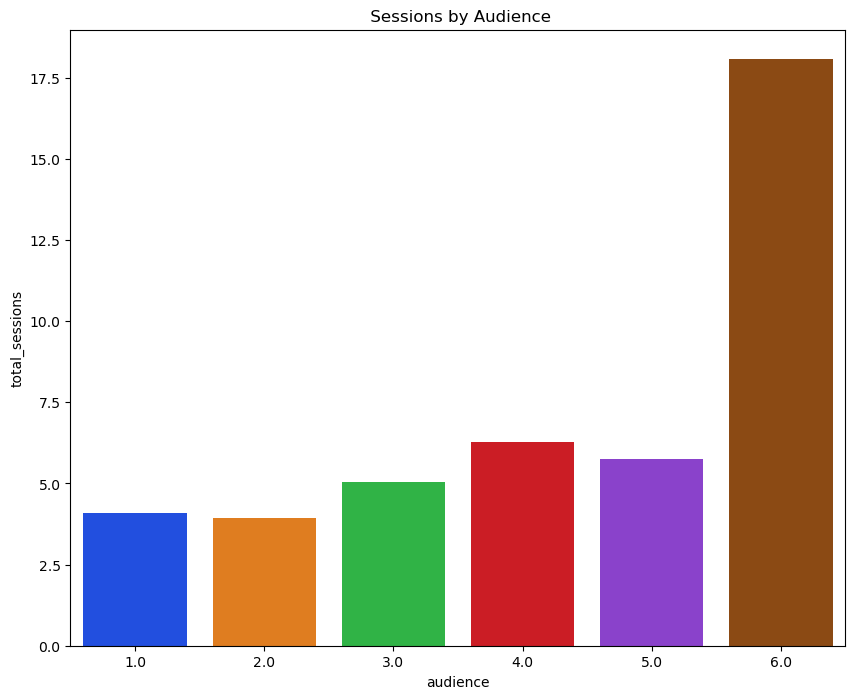

In [113]:
#Barplot for sessions across audiences
sns.barplot(x='audience', y='total_sessions',
             data=general,palette='bright',
             ci=None).set_title(' Sessions by Audience')

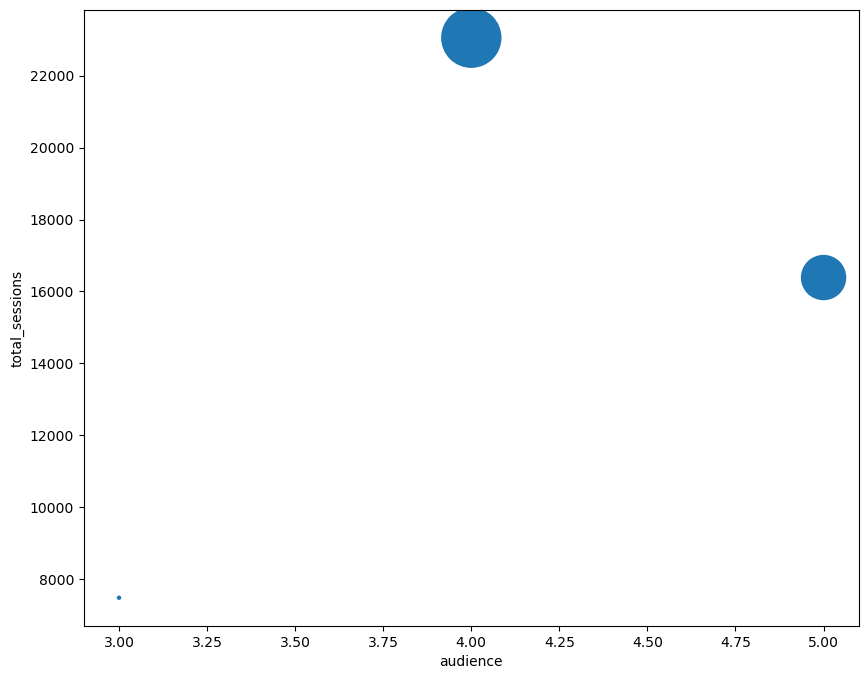

In [94]:
# Barplot for total sessions across audiences 3-5
# use the scatterplot function to build the bubble map
sns.scatterplot(data=gn_sum, x="audience", y="total_sessions", size= 'total_sessions',legend=False, sizes=(20, 2000))

# show the graph
plt.show()

Text(0.5, 1.0, 'Audiences 3-5 - Sessions per Month')

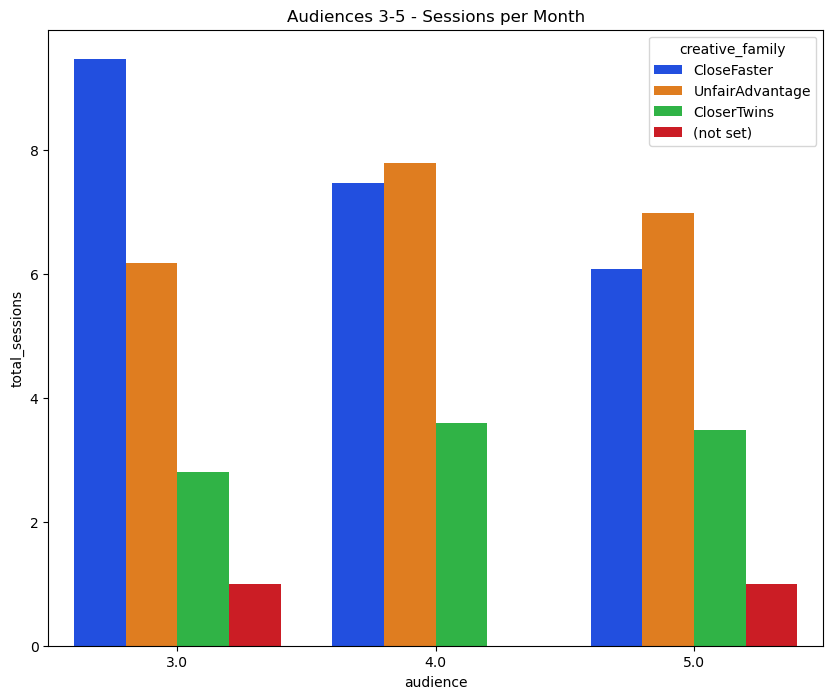

In [97]:
#Barplot for sessions across audiences
sns.barplot(x='audience', y='total_sessions',
             data=general_new,hue= 'creative_family',palette='bright',
             ci=None).set_title('Audiences 3-5 - Sessions per Month')

Text(0.5, 1.0, 'Completions per Month(Campaign Traffic)')

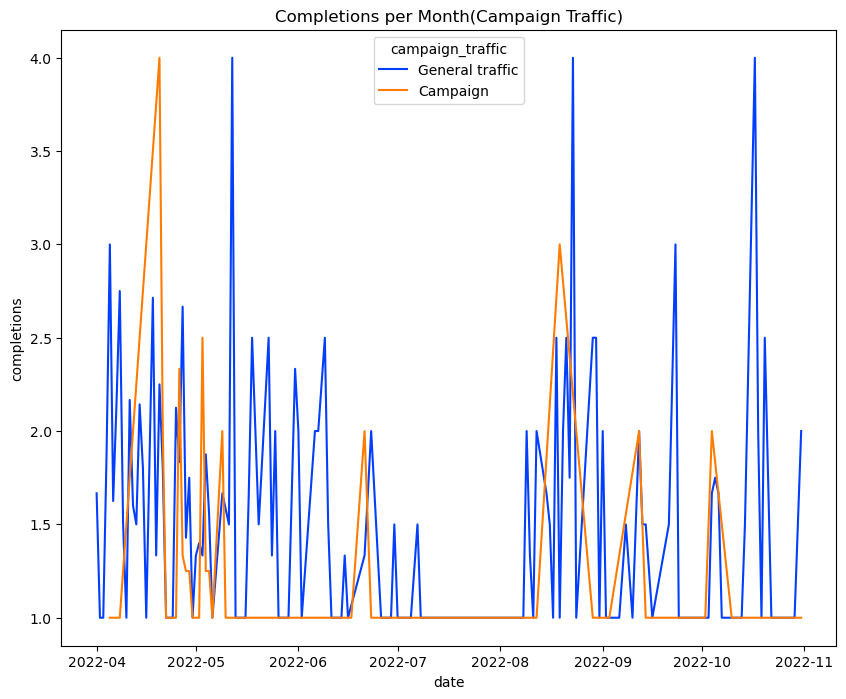

In [112]:
#Barplot for sessions across audiences
sns.lineplot(x='date', y='completions',
             data=newbees,hue= 'campaign_traffic',palette='bright',
             ci=None).set_title('Completions per Month(Campaign Traffic)')

Text(0.5, 1.0, 'Completions per Month(Campaign Traffic)')

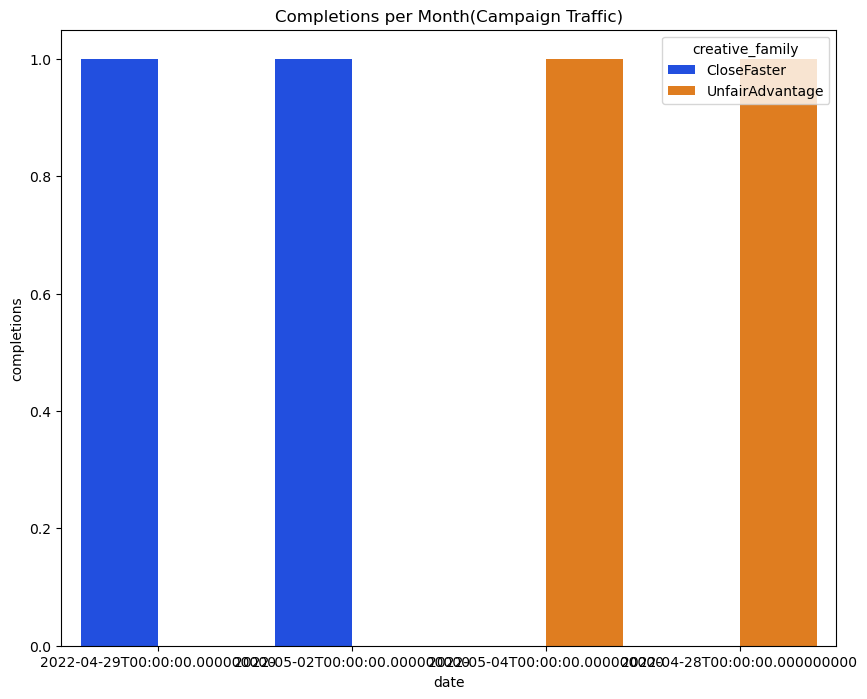

In [119]:
#Barplot for sessions across audiences
sns.barplot(x='date', y='completions',
             data=newbees_aa,hue= 'creative_family',palette='bright',
             ci=None).set_title('Completions per Month(Campaign Traffic)')

### Above visulisation shouldnt be utilised due to scale and x-axis isnt readable ( look to adjust angle of x-axis values)